In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.tail()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df.rename(columns={'v1': 'Classification', 'v2': 'SMS Text'}, inplace=True)
df.head()

,Classification,SMS Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


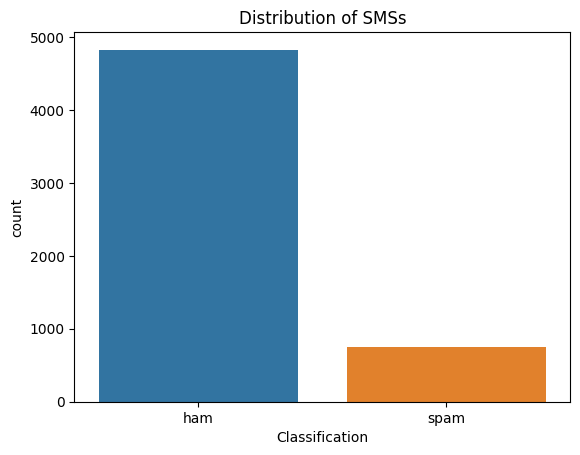

In [12]:
sns.countplot(data=df, x='Classification')
plt.xlabel('Classification')
plt.ylabel('count')
plt.title('Distribution of SMSs')
plt.show()

In [13]:
df['Classification'] = encoder.fit_transform(df['Classification'])

In [14]:
df.head()

,Classification,SMS Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.duplicated().sum()

403

In [16]:
df = df.drop_duplicates(keep='first')

In [19]:
import nltk
df['num_char'] = df['SMS Text'].apply(len)

In [20]:
df.head()

,Classification,SMS Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
subset = df[df['Classification'] == 1]  # Select rows where 'Classification' is equal to 1
description = subset['Classification'].describe()  # Describe the 'Classification' column for the selected subset

print(description)

count    653.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Classification, dtype: float64


In [24]:
subset2 = df[df['Classification'] == 0]  # Select rows where 'Classification' is equal to 1
description = subset['Classification'].describe()  # Describe the 'Classification' column for the selected subset

print(description)

count    653.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Classification, dtype: float64


In [25]:
df.describe()

,Classification,num_char
count,5169.000000,5169.000000
mean,0.126330,78.977945
std,0.332253,58.236293
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,0.000000,117.000000
max,1.000000,910.000000


In [26]:



mean_num_char = df.groupby('Classification')['num_char'].mean()

print(mean_num_char)

Classification
0     70.459256
1    137.891271
Name: num_char, dtype: float64


Spam SMS has higher number of characters



In [28]:
df['num_words'] = df['SMS Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()


,Classification,SMS Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
mean_num_words = df.groupby('Classification')['num_words'].mean()

print(mean_num_words)

Classification
0    16.957484
1    27.474732
Name: num_words, dtype: float64


In [33]:
df['num_sentences'] = df['SMS Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Classification,SMS Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
mean_num_sentences = df.groupby('Classification')['num_sentences'].mean()

print(mean_num_sentences)

Classification
0    1.815545
1    2.969372
Name: num_sentences, dtype: float64


In [36]:
import seaborn as sns

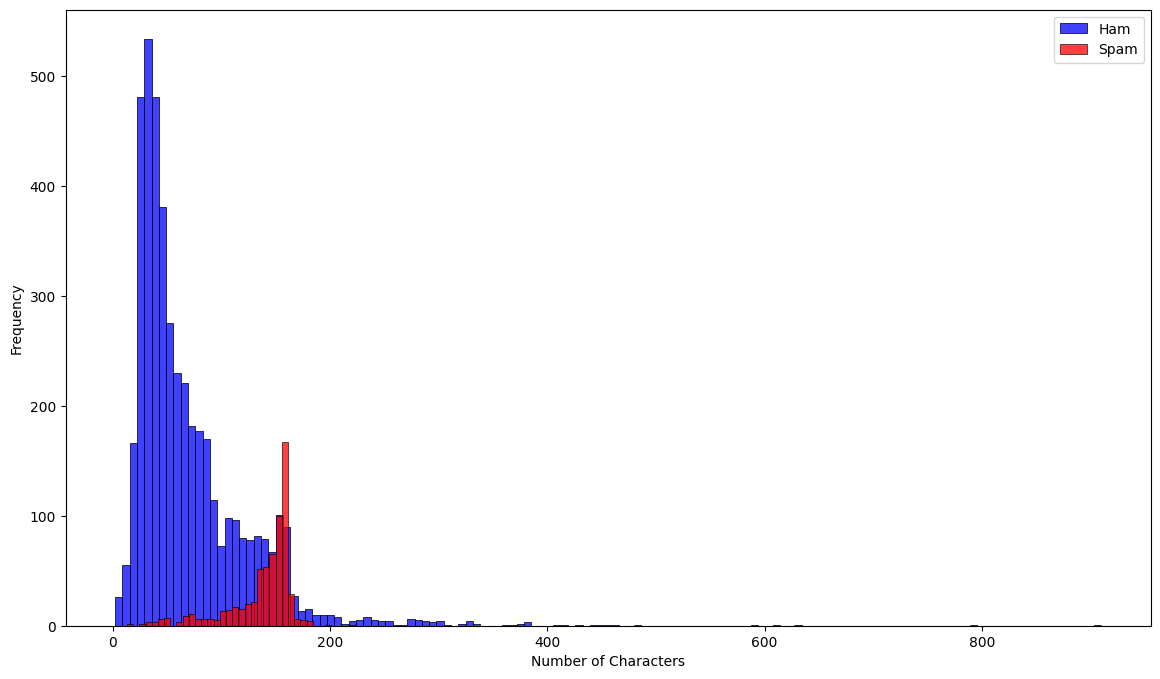

In [42]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classification']==0]['num_char'], color='blue', label='Ham')
sns.histplot(df[df['Classification']==1]['num_char'], color='red', label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.legend()

plt.show()

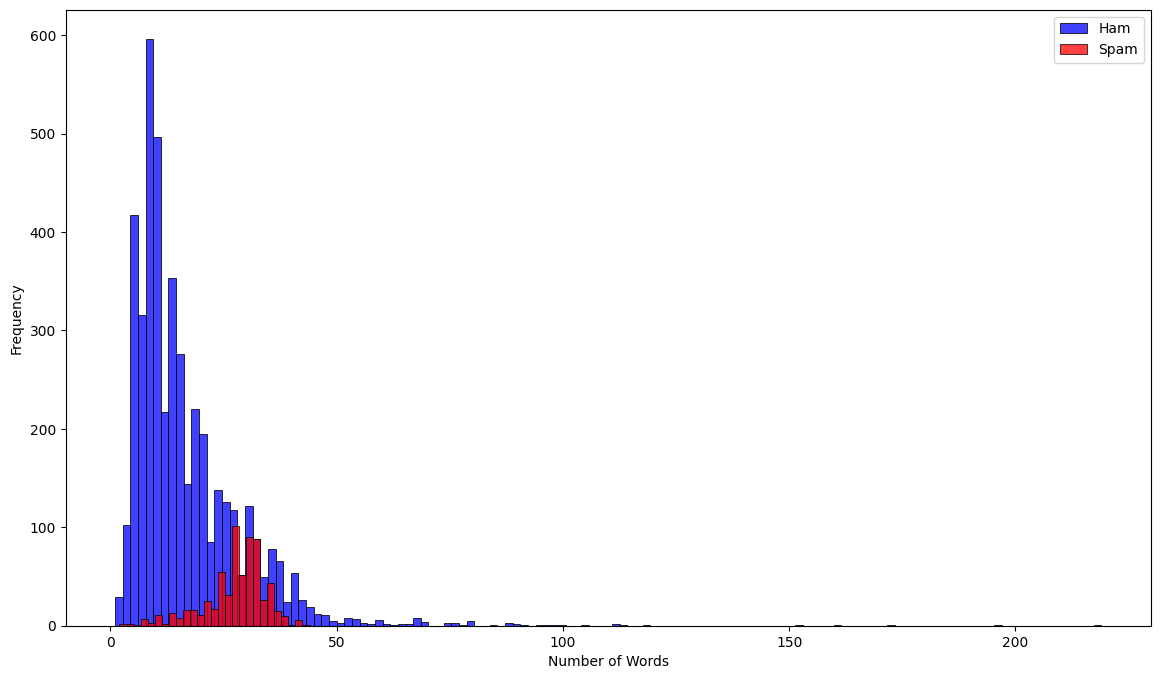

In [44]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classification']==0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['Classification']==1]['num_words'], color='red', label ='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.show()

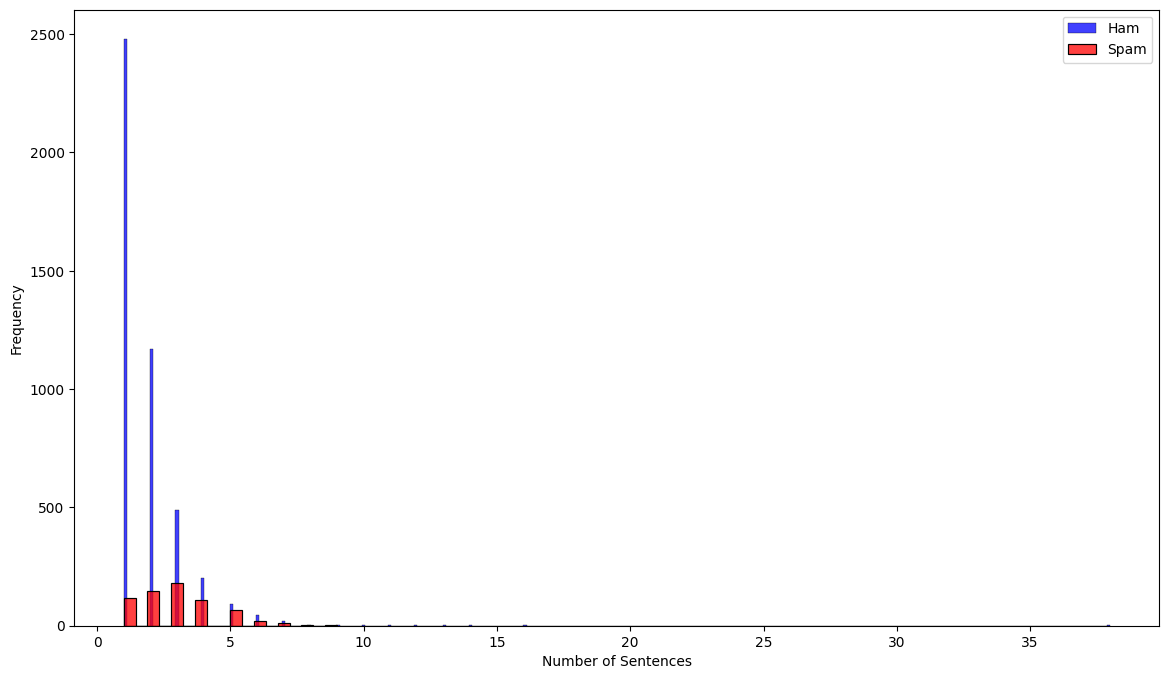

In [45]:
plt.figure(figsize=(14, 8))
sns.histplot(df[df['Classification']==0]['num_sentences'], color='blue', label='Ham')
sns.histplot(df[df['Classification']==1]['num_sentences'], color='red', label ='Spam')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.legend()

plt.show()

<Axes: >

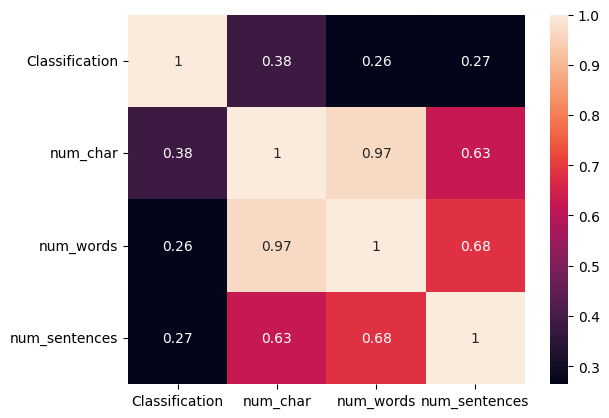

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [50]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit-transform the 'SMS Text' data for spam messages
spam_texts = df[df['Classification'] == 1]['SMS Text']
tfidf_matrix = tfidf_vectorizer.fit_transform(spam_texts)

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Calculate the mean TF-IDF score for each word
mean_tfidf_scores = tfidf_matrix.mean(axis=0).A1

# Create a DataFrame to store the words and their mean TF-IDF scores
word_tfidf_df = pd.DataFrame({'word': feature_names, 'mean_tfidf_score': mean_tfidf_scores})

# Sort the DataFrame by mean TF-IDF score in descending order to identify high spam words
high_spam_words = word_tfidf_df.sort_values(by='mean_tfidf_score', ascending=False)

# Display the top high spam words
print(high_spam_words.head(50))

            word  mean_tfidf_score
1315        free          0.035586
1739      mobile          0.024252
2480         txt          0.023741
2523          ur          0.023206
2389        text          0.023152
1009       claim          0.022208
2300        stop          0.022183
2092       reply          0.021906
1998       prize          0.021738
2657         www          0.017787
1810         new          0.017562
2645         won          0.016809
961         cash          0.016809
2525      urgent          0.016528
1534        just          0.015950
1070     contact          0.015114
339         150p          0.015045
2182     service          0.014889
1821       nokia          0.014677
2496          uk          0.014328
2177        send          0.014077
2626         win          0.013131
1394  guaranteed          0.012646
1705     message          0.012461
2610        week          0.012347
1767         msg          0.012263
1917       phone          0.012235
1111    customer    

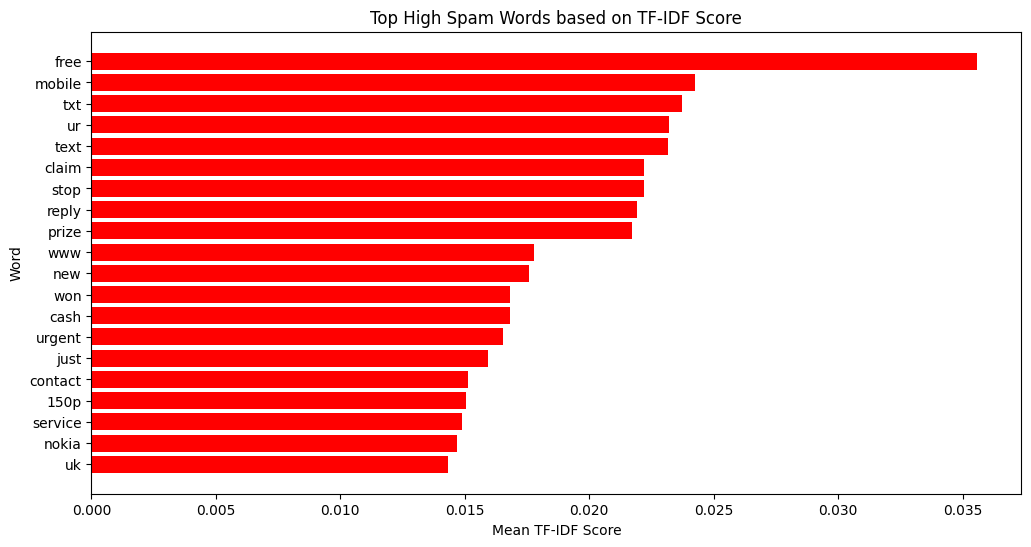

In [53]:
high_spam_words = word_tfidf_df.sort_values(by='mean_tfidf_score', ascending=False).head(20)

# Plotting the top high spam words and their TF-IDF scores
plt.figure(figsize=(12, 6))
plt.barh(high_spam_words['word'], high_spam_words['mean_tfidf_score'], color='red')
plt.xlabel('Mean TF-IDF Score')
plt.ylabel('Word')
plt.title('Top High Spam Words based on TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score at the top
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Split the data into training and testing sets
X = df['SMS Text']
y = df['Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9642166344294004

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.76      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix:
[[887   2]
 [ 35 110]]


In [57]:
example_message = ["Free entry prize in 2 a wkly comp to win FA Cup final tickets!"]

example_message_tfidf = tfidf_vectorizer.transform(example_message)

predicted_label = model.predict(example_message_tfidf)

# Map the numerical label back to 'ham' or 'spam'
predicted_class = 'ham' if predicted_label == 0 else 'spam'

print(f"The model predicts the example message as: {predicted_class}")

The model predicts the example message as: spam
